In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time
from datetime import timedelta
import mercury as mr 
import warnings
warnings.filterwarnings('ignore')

In [3]:
app = mr.App(title="E23 2023 Analysis")

mercury.App

<font size="7">This page analyses the 2023 E23 ebike mountain bike race.  </font>

<font size="3">The first section looks at the results of the race by a number of metrics. The second section analyses just the competitors named in the box. Put your list of riders in to see how they compare on metrics that account for performance relative to class entered and metrics that discard outlying stages such as those affected by mechanical failures or falls. 

All data is from https://www.rootsandrain.com/event12027/2023-aug-20-tweedlove-bosch-electric-weekend-tweed-valley/results. Any names entered must match those exactly as I CBA to write error checking code. Note: Roots and Rain names are sometimes different to those on sportident. 

In this race riders were allowed to miss stages- only a subset of stages on each day were required to be completed. In order to make this analysis work a default time of 10 minutes has been used for missing stages. Make sure to look at the median metrics for a more accurate analysis of riders who chose to miss stages.

Any questions, please email mulholland.william@gmail.com with the subject: mtb Analysis question.

If this page is of more than fleeting interest, please consider donating to the air ambulance service: https://theairambulanceservice.org.uk

 </font>

In [4]:
#read the results data from the site
df1 = pd.read_csv("E23_SaturdayResults.csv", index_col=1)
df2 = pd.read_csv("E23_SundayResults.csv", index_col=1)


In [5]:
# join on name
df = df1.join(df2, lsuffix='', rsuffix='_r')
df = df.reset_index()

In [6]:
#convert time column from strings to datetime and calculate time/stageWinners time by stage
tZero = datetime.strptime("0:0.0", "%M:%S.%f")
tForNotDoingStage= timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=10, hours=0, weeks=0)

def stringTimeToSeconds(x):
    try:
        t = datetime.strptime(x, "%M:%S.%f") - tZero
    except:
        return tForNotDoingStage.seconds
    return t.microseconds/1e6 + t.seconds

categories = pd.Series.unique(df.Class)

def normalizedTimeFromColName(colName):
    if colName=='Overall_time':
        raceTime = df['Overall_time_seconds']
    else:
        raceTime = df[colName].apply(stringTimeToSeconds)
    
    winner = raceTime.min()
    normRaceTime = (raceTime/winner)
    return normRaceTime

def addNormTimeToDf(df,colName):
    if colName != "Overall_time":
        colName = df.columns[df.columns.str.contains(colName)][0]
    normtime = normalizedTimeFromColName(colName)
    name = colName + "_normalised"
    df[name] =  normtime
    return name

def colname_of_stage(df,p):
    return df.columns[df.columns.str.contains(p)][0]

def convertSecondsToTimespan(s):
    return str(timedelta(seconds=s))

stages = [colname_of_stage(df,i) for i in ['Stage 1:', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6', 'Stage 7', 'Stage 8', 'Stage 9', 'Stage 10', 'Stage 11', 'Stage 12', 'Stage 13', 'Stage 14']]

In [7]:
# add total time as a sum of stage times. 
df['Overall_time_seconds'] = df[stages].apply(np.vectorize(stringTimeToSeconds)).sum(axis=1)
df['Overall_time'] = df['Overall_time_seconds'].apply(np.vectorize(convertSecondsToTimespan))
stages = ['Overall_time'] + stages

In [8]:
normStages = [addNormTimeToDf(df,x) for x in stages]

<font size="5">   
Class winning times as a proportion of fastest time:</font>

In [9]:
#Do the same but by stage class winner's time
def stageMin(stage) :
    categories = pd.Series.unique(df.Class)
    categoriesMin = df.groupby('Class')[stage].min()
    return categoriesMin

normStages = pd.Series(normStages)
classMins = normStages.apply(stageMin)
classMins = classMins.set_index(normStages)
classMins

Class,14-17,18-34,18-34 (F),35-49,35-49 (F),50+,50+ (F)
Overall_time_normalised,1.054509,1.000000,1.303013,1.078039,1.127469,1.176278,1.637682
Stage 1: Green wing_normalised,1.045499,1.000000,1.212004,1.069700,1.116167,1.153921,1.360116
Stage 2: Cadon Bank_normalised,1.026302,1.000000,1.200751,1.050993,1.105743,1.117552,1.246377
Stage 3: New York _normalised,1.052146,1.000000,1.269419,1.057034,1.122216,1.153721,1.438892
Stage 4: NewSkool/PreDrinks_normalised,1.003009,1.000000,1.385155,1.066199,1.165496,1.170512,1.536610
Stage 5: Minch Descent_normalised,1.000000,1.015398,1.159110,1.029940,1.111206,1.103507,1.208725
Stage 6: Lower Quarry Enduro_normalised,1.073864,1.000000,1.543182,1.102273,1.200000,1.253409,1.771591
Stage 7: Cresta Run_normalised,1.107084,1.000000,1.462109,1.120264,1.215815,1.288303,1.754530
Stage 8: TC/Ho Chi Min_normalised,1.013672,1.000000,1.289062,1.022461,1.075195,1.096680,1.294922
Stage 9: Zorro/Returns_normalised,1.034410,1.000000,1.297753,1.045646,1.099719,1.155899,1.445225


In [10]:
def stageClassFactor (stage, Class):
    return classMins.loc[stage][Class]  

def reNormByClass (stage) :  
    d = df[stage] / df['Class'].map(lambda x : stageClassFactor(stage, x))
    name = stage + "_by_class_winner_time"
    df[name] = (d)
    return name

classNormStages = [ reNormByClass(s) for s in normStages]

In [11]:
def percentileClipped(percentile, series):
    npA = (series.copy())
    npA2 = pd.Series.sort_values(npA)  
    total = int(npA2.count() * percentile) - 1
    clipped = npA2[:total]
    return(npA2[:total])

def clippedStdDev(percentile, normRaceTime):
    clipped = percentileClipped(percentile, normRaceTime)
    stDev = np.std(clipped)
    return stDev    

<font size="5">How did the top 70% of overall times compare to the fastest by stage? </font> 
  
<font size="3">Stages with greater range are the most important and most difficult (as they have the largest percent gap between the fastest and slowest riders) </font>

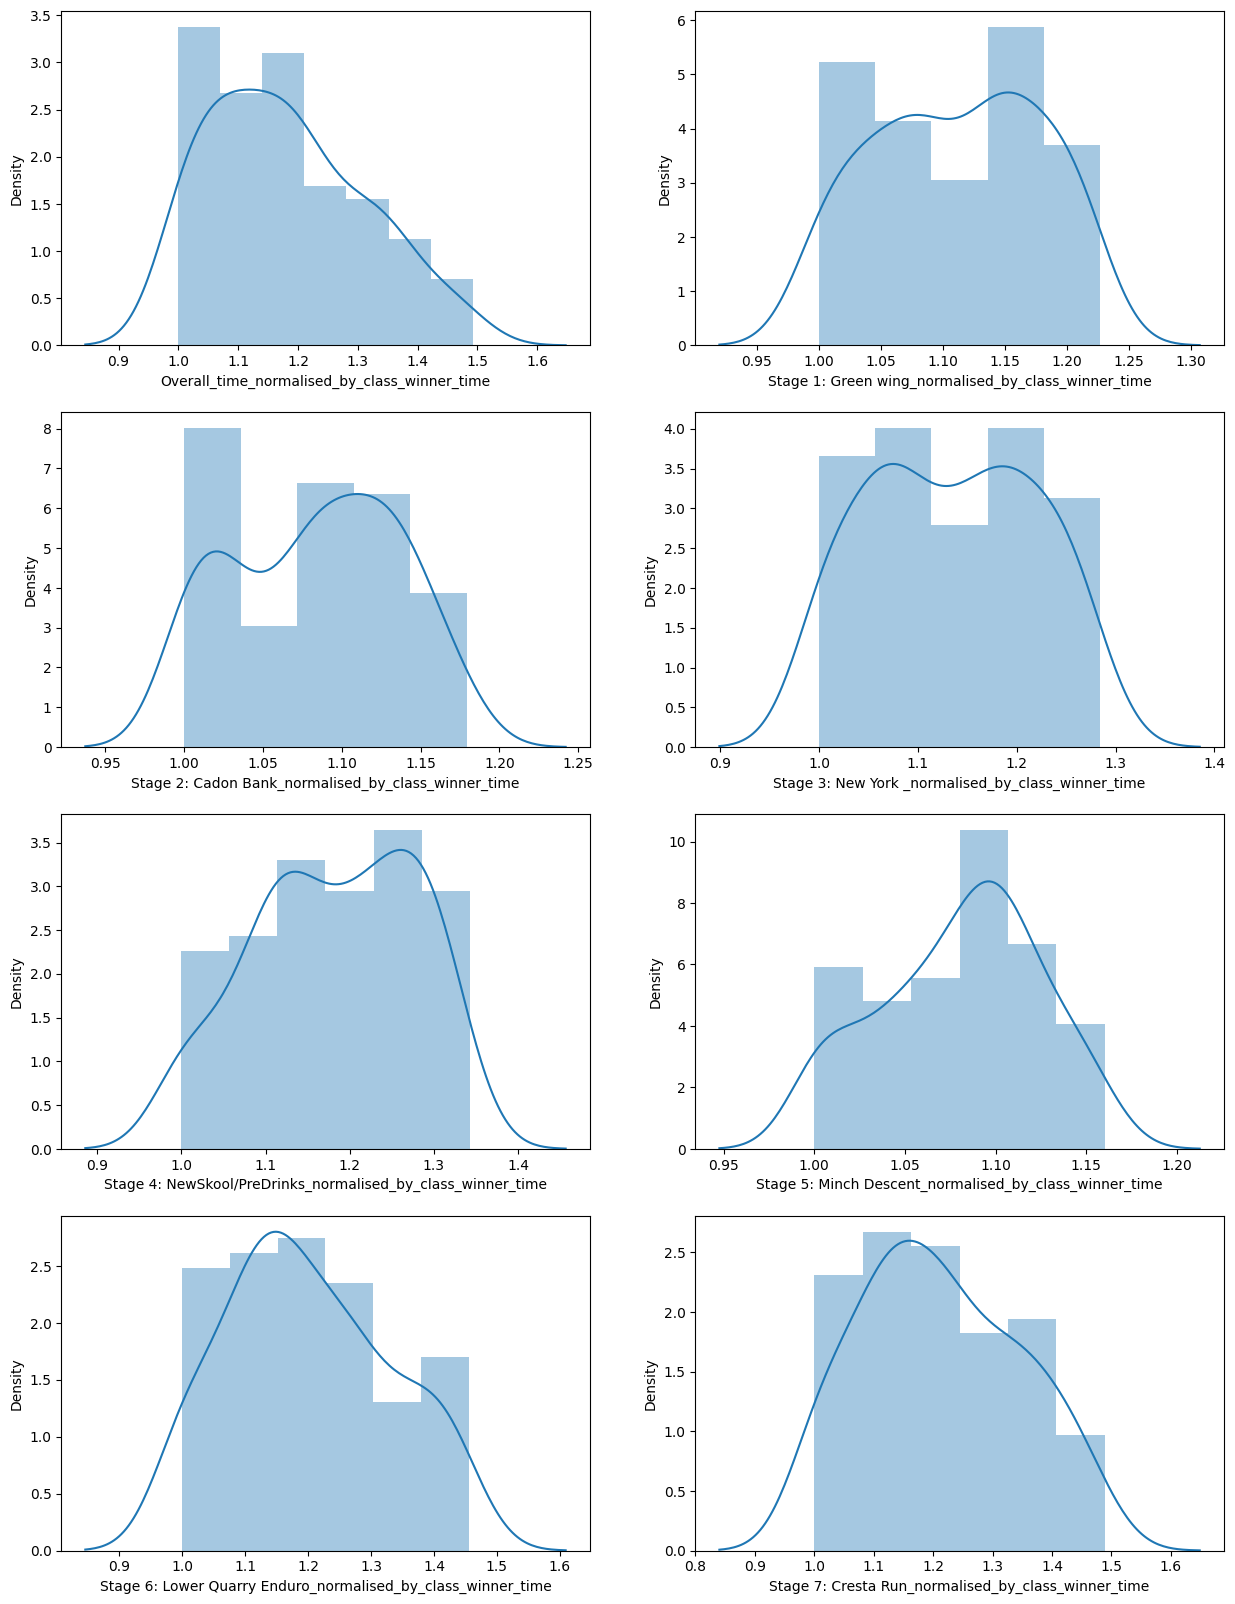

In [12]:
#distributions of the stages in one plot
percentile = 0.70
fig = plt.figure()

for i in range(min(8, len(stages))):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

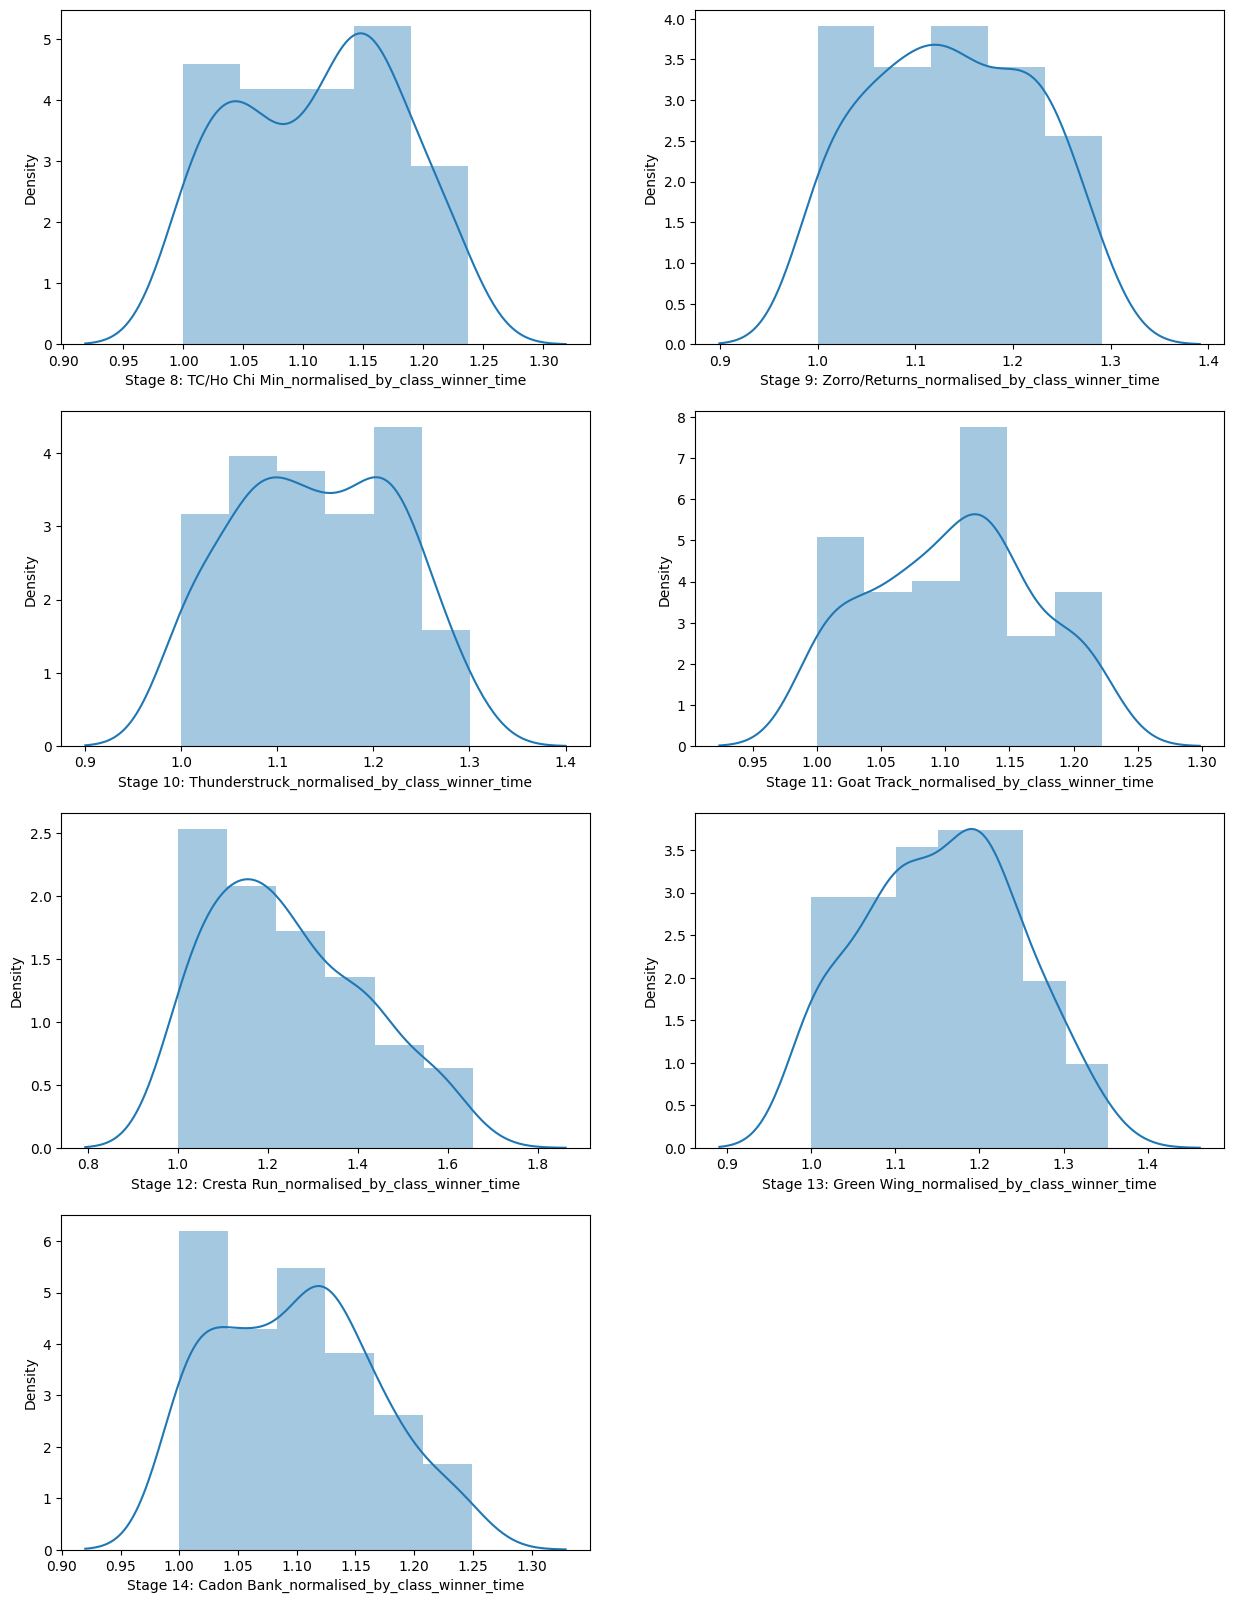

In [13]:
#distributions of the stages in one plot
percentile = 0.70
fig = plt.figure()

for i in range(max(0, len(stages) - 8)):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i+8]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

In [14]:
dfStageNorms = df[normStages[1:]]
df['Median'] = dfStageNorms.median(axis=1)
df['Min'] = dfStageNorms.min(axis=1)
df['StdDev'] = dfStageNorms.std(axis=1)

dfStageClassNorms = df[classNormStages[1:]]
df['Median_Class_Normalised'] = dfStageClassNorms.median(axis=1)
df['Min_Class_Normalised'] = dfStageClassNorms.min(axis=1)
df['Std_Class_Normalised'] = dfStageClassNorms.std(axis=1)

In [15]:
def calculatePositionOnSorted(measure):
    position = pd.Series(np.arange(pd.Series.count(df[measure])) + 1)
    sameMeasure = (df[measure] == df[measure].shift(1))

    j = [1]
    def previousPosIfEqual(i):
        if sameMeasure[i]:
            return j[0]
        else:
            j[0] = position[i]
            return position[i]
    
    pos  = [previousPosIfEqual(i) for i in (np.arange(pd.Series.count(df[measure])))]
    return pos

def addPositions(measure):
    df.sort_values(measure, inplace=True)
    name = 'Pos' + measure
    df[name] = calculatePositionOnSorted(measure)
    return name

positionFields = [addPositions(m) for m in ['Overall_time_normalised', 'Overall_time_normalised_by_class_winner_time', 'Median', 'Median_Class_Normalised',]]
df.sort_values('Overall_time_normalised', inplace=True)

<font size="5">Who were the class winners on time? </font>

In [16]:
dataToView = [ 'Name', 'Class'] + stages + list(normStages) + classNormStages + ['Median', 'Median_Class_Normalised', 'Min', 'Min_Class_Normalised']  + positionFields                                          
dataToView
dfToView = df[dataToView]

#the class winners
dfToView[dfToView['Overall_time_normalised_by_class_winner_time'] < 1.000001][['Name', 'Class', 'Overall_time']]

,Name,Class,Overall_time
0,William BRODIE,18-34,0:29:32.200000
1,Leo FRATER,14-17,0:31:08.800000
4,Davi ROBERTS,35-49,0:31:50.500000
15,Tracy MOSELEY,35-49 (F),0:33:18.100000
29,Paul WHELDON,50+,0:34:44.600000
77,Rowan MASTERSON,18-34 (F),0:38:29.200000
109,Wendy WELCH-SMITH,50+ (F),0:48:22.300000


<font size="5">What if we discard outlying stages? </font>
  
<font size="3">If we take the stage results for each rider and pick only their middle result (the median), we discard any outlying slow (or fast) stages.</font>

In [17]:
# who were the top 10 median by class?
dfToView.sort_values('Median_Class_Normalised')[['Name', 'Class','Median_Class_Normalised', 'Overall_time']][0:10]

,Name,Class,Median_Class_Normalised,Overall_time
0,William BRODIE,18-34,1.000000,0:29:32.200000
1,Leo FRATER,14-17,1.000000,0:31:08.800000
77,Rowan MASTERSON,18-34 (F),1.000000,0:38:29.200000
109,Wendy WELCH-SMITH,50+ (F),1.000000,0:48:22.300000
15,Tracy MOSELEY,35-49 (F),1.000000,0:33:18.100000
3,Jamie HARRIS (ebike),35-49,1.002940,0:32:00.500000
29,Paul WHELDON,50+,1.007424,0:34:44.600000
4,Davi ROBERTS,35-49,1.009238,0:31:50.500000
2,Eli SHEARER,14-17,1.015778,0:31:17.300000
30,Mark DOUGHTY,50+,1.018281,0:34:50.800000


In [18]:
competitors_list = mr.Text(label="Which competitors would you like to compare?", value="Tracy MOSELEY, William MULHOLLAND, Rowland JOWETT, Rob HANCILL")

mercury.Text

In [19]:
competitors_list = competitors_list.value.split(', ')

<font size="5">Section 2: Comparison of named competitors list</font>
  
<font size="3">Results ordered by overall time: note that any stages not completed were given a default time of 10 minutes. This will make this a bad metric: look at the median metrics for a more accurate analysis of riders who chose to miss stages. </font>

In [20]:
#index by name and select our group
dataNamed = dfToView.set_index('Name')

d = dataNamed.loc[competitors_list]

#show results ordered by race time
d.sort_values('Overall_time_normalised')[[ 'Class', 'Overall_time', 'Overall_time_normalised']]

,Class,Overall_time,Overall_time_normalised
Name,,,
Tracy MOSELEY,35-49 (F),0:33:18.100000,1.127469
Rowland JOWETT,35-49,0:34:47.700000,1.178027
William MULHOLLAND,35-49,0:36:27.300000,1.234229
Rob HANCILL,35-49,0:52:18.500000,1.770963


<font size="3">
  
Results ordered by overall time/class winner time  </font>

In [21]:
#show results ordered by race time
d.sort_values('Overall_time_normalised_by_class_winner_time')[[ 'Class', 'Overall_time_normalised_by_class_winner_time','Overall_time']]

,Class,Overall_time_normalised_by_class_winner_time,Overall_time
Name,,,
Tracy MOSELEY,35-49 (F),1.000000,0:33:18.100000
Rowland JOWETT,35-49,1.092751,0:34:47.700000
William MULHOLLAND,35-49,1.144884,0:36:27.300000
Rob HANCILL,35-49,1.642764,0:52:18.500000


<font size="3">
  
Results ordered by the fastest time/winners time on any stage (note: winner, not class winner)</font>

In [22]:
#results ordered by min stage time/stage winners time on any stage
d.sort_values('Min')[['Class','Min','Overall_time']]

,Class,Min,Overall_time
Name,,,
Tracy MOSELEY,35-49 (F),1.075195,0:33:18.100000
Rowland JOWETT,35-49,1.088867,0:34:47.700000
Rob HANCILL,35-49,1.089820,0:52:18.500000
William MULHOLLAND,35-49,1.135158,0:36:27.300000


<font size="3">
  
Results ordered by the fastest time/class winner time on any stage</font>

In [23]:
# as above but by class stage winners time
d.sort_values('Min_Class_Normalised')[['Class','Min_Class_Normalised','Overall_time']]

,Class,Min_Class_Normalised,Overall_time
Name,,,
Tracy MOSELEY,35-49 (F),1.000000,0:33:18.100000
Rob HANCILL,35-49,1.058140,0:52:18.500000
Rowland JOWETT,35-49,1.058733,0:34:47.700000
William MULHOLLAND,35-49,1.102159,0:36:27.300000


<font size="3">
  
Results ordered by the median of each riders time/winner time on all stages (note winner not class winner)</font>

In [24]:
# the results sorted by median (stage time/stage winners time)
d.sort_values('Median')[['Class','Median', 'Overall_time']]

,Class,Median,Overall_time
Name,,,
Tracy MOSELEY,35-49 (F),1.119191,0:33:18.100000
Rowland JOWETT,35-49,1.169569,0:34:47.700000
William MULHOLLAND,35-49,1.216615,0:36:27.300000
Rob HANCILL,35-49,1.269989,0:52:18.500000


<font size="3">
  
Results ordered by the median of each riders time/class winner time on all stages</font>

In [25]:

dz = d.sort_values('Median_Class_Normalised')[['Class','Median_Class_Normalised', 'Overall_time']] #['Class', 'Time', 'TimeNorm', 'TimeNormClassNorm', 'Median', 'MedianClassNorm' , 'Min' , 'MinClassNorm']
dz

,Class,Median_Class_Normalised,Overall_time
Name,,,
Tracy MOSELEY,35-49 (F),1.000000,0:33:18.100000
Rowland JOWETT,35-49,1.109005,0:34:47.700000
William MULHOLLAND,35-49,1.148091,0:36:27.300000
Rob HANCILL,35-49,1.203399,0:52:18.500000


In [37]:
d.sort_values('Overall_time_normalised')[df.columns[df.columns.str.contains('normalised') & (~df.columns.str.contains('class'))]]

,Overall_time_normalised,Stage 1: Green wing_normalised,Stage 2: Cadon Bank_normalised,Stage 3: New York _normalised,Stage 4: NewSkool/PreDrinks_normalised,Stage 5: Minch Descent_normalised,Stage 6: Lower Quarry Enduro_normalised,Stage 7: Cresta Run_normalised,Stage 8: TC/Ho Chi Min_normalised,Stage 9: Zorro/Returns_normalised,Stage 10: Thunderstruck_normalised,Stage 11: Goat Track_normalised,Stage 12: Cresta Run_normalised,Stage 13: Green Wing_normalised,Stage 14: Cadon Bank_normalised,PosOverall_time_normalised
Name,,,,,,,,,,,,,,,,
Tracy MOSELEY,1.127469,1.116167,1.105743,1.122216,1.165496,1.111206,1.200000,1.215815,1.075195,1.099719,1.151376,1.102256,1.192821,1.143574,1.082073,17
Rowland JOWETT,1.178027,1.153921,1.112721,1.166214,1.239719,1.118050,1.307955,1.276771,1.088867,1.141152,1.167431,1.181203,1.267947,1.207831,1.171706,28
William MULHOLLAND,1.234229,1.218780,1.171766,1.254210,1.376128,1.135158,1.314773,1.371499,1.164062,1.162219,1.214450,1.190226,1.379800,1.247992,1.196544,45
Rob HANCILL,1.770963,1.326234,1.181428,1.288973,1.338014,1.089820,6.818182,1.485997,1.210938,1.241573,1.298165,1.140602,5.008347,1.251004,1.147948,107
